In [1]:
from tqdm import tqdm
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.models as models
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator
from numpy.random import RandomState
import numpy as np
import torch
import torch.optim as optim
from torch.utils.data import Subset
import re
from torchvision import datasets, transforms

In [2]:
%matplotlib inline
import autogluon.core as ag
from autogluon.vision import ImageDataset, ImagePredictor
import pandas as pd
import os

In [3]:
csv_file = './tmp/pneumoniamnist.csv'

In [4]:
!rm ./tmp/pneumoniamnist.csv
!python -m medmnist save --flag=pneumoniamnist --folder=tmp/ --postfix=png
df = pd.read_csv(csv_file, names=['set', 'image', 'label'])
df.to_csv(csv_file, index=False)
df.head()

Saving pneumoniamnist train...
100%|█████████████████████████████████████| 4708/4708 [00:01<00:00, 4140.60it/s]
Saving pneumoniamnist val...
100%|███████████████████████████████████████| 524/524 [00:00<00:00, 4184.44it/s]
Saving pneumoniamnist test...
100%|███████████████████████████████████████| 624/624 [00:00<00:00, 4185.12it/s]


,set,image,label
0,TRAIN,train0_1.png,1
1,TRAIN,train1_1.png,1
2,TRAIN,train2_1.png,1
3,TRAIN,train3_1.png,1
4,TRAIN,train4_1.png,1


In [5]:
data = ImageDataset.from_csv(csv_file, root=os.path.join(os.getcwd(), 'tmp', 'pneumoniamnist'))

data.show_images()

In [6]:
train_data = data[data['set'] == 'TRAIN']
train_data['set'].value_counts()

TRAIN    4708
Name: set, dtype: int64

In [7]:
val_data = data[data['set'] == 'VALIDATION']
val_data['set'].value_counts()

VALIDATION    524
Name: set, dtype: int64

In [8]:
test_data = data[data['set'] == 'TEST']
test_data['set'].value_counts()

TEST    624
Name: set, dtype: int64

In [9]:
n_classes = len(data.classes)
accs_val = []
for seed in range(1, 51):
  prng = RandomState(seed)
  random_permute = prng.permutation(np.arange(0, 1000))
  random_permute_val = prng.permutation(np.arange(0, 135))
  train_top = 10//n_classes
  val_top = 100//n_classes
  indx_train = np.concatenate([np.where(train_data.label == label)[0][random_permute[0:train_top]] for label in train_data.classes])
  indx_val = np.concatenate([np.where(val_data.label == label)[0][random_permute_val[0:val_top]] for label in val_data.classes])
  predictor = ImagePredictor()
  predictor.fit(train_data.iloc[indx_train], val_data);
  accs_val.append(predictor.evaluate(val_data))

`time_limit=auto` set to `time_limit=7200`.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
/home/z_yuxian/miniconda3/envs/nn/lib/python3.8/site-packages/autogluon/vision/utils/space_sanitizer.py:33: UserWarning: Adjusting batch size from 16 to 10 due to memory limit.
  warnings.warn(f'Adjusting batch size from {batch_size} to {new_bs} due to memory limit.')
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 236
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/0253f4c6/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not enabled. Trainin

[Epoch 13] speed: 0 samples/sec	time cost: 0.092268
[Epoch 13] validation: top1=0.265267 top5=1.000000
[Epoch 14] training: accuracy=1.000000
[Epoch 14] speed: 0 samples/sec	time cost: 0.141883
[Epoch 14] validation: top1=0.263359 top5=1.000000
Applying the state from the best checkpoint...
Finished, total runtime is 28.45 s
{ 'best_config': { 'batch_size': 10,
                   'dist_ip_addrs': None,
                   'early_stop_baseline': -inf,
                   'early_stop_max_value': inf,
                   'early_stop_patience': 10,
                   'epochs': 15,
                   'final_fit': False,
                   'gpus': [0],
                   'lr': 0.01,
                   'model': 'resnet50',
                   'ngpus_per_trial': 8,
                   'nthreads_per_trial': 128,
                   'num_workers': 20,
                   'searcher': 'random',
                   'seed': 66,
                   'time_limits': 7200},
  'total_time': 24.658668518066406,
  '

[Epoch 7] validation: top1=0.288168 top5=1.000000
[Epoch 8] training: accuracy=0.500000
[Epoch 8] speed: 0 samples/sec	time cost: 0.198284
[Epoch 8] validation: top1=0.284351 top5=1.000000
[Epoch 9] training: accuracy=0.800000
[Epoch 9] speed: 0 samples/sec	time cost: 0.103182
[Epoch 9] validation: top1=0.305343 top5=1.000000
[Epoch 10] training: accuracy=0.500000
[Epoch 10] speed: 0 samples/sec	time cost: 0.142426
[Epoch 10] validation: top1=0.286260 top5=1.000000
[Epoch 11] training: accuracy=0.900000
[Epoch 11] speed: 0 samples/sec	time cost: 0.118322
[Epoch 11] validation: top1=0.263359 top5=1.000000
[Epoch 12] training: accuracy=0.900000
[Epoch 12] speed: 0 samples/sec	time cost: 0.136666
[Epoch 12] validation: top1=0.261450 top5=1.000000
[Epoch 13] EarlyStop after 10 epochs: no better than 0.509541965509189
Applying the state from the best checkpoint...
Finished, total runtime is 23.46 s
{ 'best_config': { 'batch_size': 10,
                   'dist_ip_addrs': None,
              

[Epoch 0] validation: top1=0.246183 top5=1.000000
[Epoch 0] Current best top-1: 0.246183 vs previous -inf, saved to /home/z_yuxian/nn/ee05df8a/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.500000
[Epoch 1] speed: 0 samples/sec	time cost: 0.126533
[Epoch 1] validation: top1=0.251908 top5=1.000000
[Epoch 1] Current best top-1: 0.251908 vs previous 0.246183, saved to /home/z_yuxian/nn/ee05df8a/.trial_0/best_checkpoint.pkl
[Epoch 2] training: accuracy=0.500000
[Epoch 2] speed: 0 samples/sec	time cost: 0.142215
[Epoch 2] validation: top1=0.276718 top5=1.000000
[Epoch 2] Current best top-1: 0.276718 vs previous 0.251908, saved to /home/z_yuxian/nn/ee05df8a/.trial_0/best_checkpoint.pkl
[Epoch 3] training: accuracy=0.300000
[Epoch 3] speed: 0 samples/sec	time cost: 0.122279
[Epoch 3] validation: top1=0.257634 top5=1.000000
[Epoch 4] training: accuracy=0.700000
[Epoch 4] speed: 0 samples/sec	time cost: 0.097150
[Epoch 4] validation: top1=0.257634 top5=1.000000
[Epoch 5] training: 

[Epoch 7] validation: top1=0.746183 top5=1.000000
ImagePredictor sets accuracy as default eval_metric for classification problems.
`time_limit=auto` set to `time_limit=7200`.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
/home/z_yuxian/miniconda3/envs/nn/lib/python3.8/site-packages/autogluon/vision/utils/space_sanitizer.py:33: UserWarning: Adjusting batch size from 16 to 10 due to memory limit.
  warnings.warn(f'Adjusting batch size from {batch_size} to {new_bs} due to memory limit.')
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 766
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/4deb5e9a/

[Epoch 1] validation: top1=0.311069 top5=1.000000
ImagePredictor sets accuracy as default eval_metric for classification problems.
`time_limit=auto` set to `time_limit=7200`.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
/home/z_yuxian/miniconda3/envs/nn/lib/python3.8/site-packages/autogluon/vision/utils/space_sanitizer.py:33: UserWarning: Adjusting batch size from 16 to 10 due to memory limit.
  warnings.warn(f'Adjusting batch size from {batch_size} to {new_bs} due to memory limit.')
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 338
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/ec0b7107/

[Epoch 12] speed: 0 samples/sec	time cost: 0.141325
[Epoch 12] validation: top1=0.639313 top5=1.000000
[Epoch 12] Current best top-1: 0.639313 vs previous 0.604962, saved to /home/z_yuxian/nn/4926ea0e/.trial_0/best_checkpoint.pkl
[Epoch 13] training: accuracy=0.800000
[Epoch 13] speed: 0 samples/sec	time cost: 0.092757
[Epoch 13] validation: top1=0.662214 top5=1.000000
[Epoch 13] Current best top-1: 0.662214 vs previous 0.639313, saved to /home/z_yuxian/nn/4926ea0e/.trial_0/best_checkpoint.pkl
[Epoch 14] training: accuracy=0.600000
[Epoch 14] speed: 0 samples/sec	time cost: 0.141539
[Epoch 14] validation: top1=0.667939 top5=1.000000
[Epoch 14] Current best top-1: 0.667939 vs previous 0.662214, saved to /home/z_yuxian/nn/4926ea0e/.trial_0/best_checkpoint.pkl
Applying the state from the best checkpoint...
Finished, total runtime is 32.03 s
{ 'best_config': { 'batch_size': 10,
                   'dist_ip_addrs': None,
                   'early_stop_baseline': -inf,
                   'ear

[Epoch 6] training: accuracy=0.600000
[Epoch 6] speed: 0 samples/sec	time cost: 0.144928
[Epoch 6] validation: top1=0.290076 top5=1.000000
[Epoch 7] training: accuracy=0.600000
[Epoch 7] speed: 0 samples/sec	time cost: 0.143542
[Epoch 7] validation: top1=0.291985 top5=1.000000
[Epoch 8] training: accuracy=0.600000
[Epoch 8] speed: 0 samples/sec	time cost: 0.140851
[Epoch 8] validation: top1=0.307252 top5=1.000000
[Epoch 9] training: accuracy=0.600000
[Epoch 9] speed: 0 samples/sec	time cost: 0.129061
[Epoch 9] validation: top1=0.362595 top5=1.000000
[Epoch 10] training: accuracy=0.500000
[Epoch 10] speed: 0 samples/sec	time cost: 0.109353
[Epoch 10] validation: top1=0.410305 top5=1.000000
[Epoch 11] training: accuracy=0.600000
[Epoch 11] speed: 0 samples/sec	time cost: 0.134735
[Epoch 11] validation: top1=0.450382 top5=1.000000
[Epoch 12] EarlyStop after 10 epochs: no better than 0.7633587510986183
Applying the state from the best checkpoint...
Finished, total runtime is 22.37 s
{ 'bes

[Epoch 2] training: accuracy=0.300000
[Epoch 2] speed: 0 samples/sec	time cost: 0.145685
[Epoch 2] validation: top1=0.374046 top5=1.000000
[Epoch 2] Current best top-1: 0.374046 vs previous 0.291985, saved to /home/z_yuxian/nn/675e8443/.trial_0/best_checkpoint.pkl
[Epoch 3] training: accuracy=0.600000
[Epoch 3] speed: 0 samples/sec	time cost: 0.140472
[Epoch 3] validation: top1=0.410305 top5=1.000000
[Epoch 3] Current best top-1: 0.410305 vs previous 0.374046, saved to /home/z_yuxian/nn/675e8443/.trial_0/best_checkpoint.pkl
[Epoch 4] training: accuracy=0.500000
[Epoch 4] speed: 0 samples/sec	time cost: 0.112371
[Epoch 4] validation: top1=0.471374 top5=1.000000
[Epoch 4] Current best top-1: 0.471374 vs previous 0.410305, saved to /home/z_yuxian/nn/675e8443/.trial_0/best_checkpoint.pkl
[Epoch 5] training: accuracy=0.300000
[Epoch 5] speed: 0 samples/sec	time cost: 0.118251
[Epoch 5] validation: top1=0.509542 top5=1.000000
[Epoch 5] Current best top-1: 0.509542 vs previous 0.471374, saved

[Epoch 11] validation: top1=0.587786 top5=1.000000
ImagePredictor sets accuracy as default eval_metric for classification problems.
`time_limit=auto` set to `time_limit=7200`.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
/home/z_yuxian/miniconda3/envs/nn/lib/python3.8/site-packages/autogluon/vision/utils/space_sanitizer.py:33: UserWarning: Adjusting batch size from 16 to 10 due to memory limit.
  warnings.warn(f'Adjusting batch size from {batch_size} to {new_bs} due to memory limit.')
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 113
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/402266f9

[Epoch 14] training: accuracy=0.800000
[Epoch 14] speed: 0 samples/sec	time cost: 0.141835
[Epoch 14] validation: top1=0.366412 top5=1.000000
[Epoch 14] Current best top-1: 0.366412 vs previous 0.330153, saved to /home/z_yuxian/nn/de97ae27/.trial_0/best_checkpoint.pkl
Applying the state from the best checkpoint...
Finished, total runtime is 28.54 s
{ 'best_config': { 'batch_size': 10,
                   'dist_ip_addrs': None,
                   'early_stop_baseline': -inf,
                   'early_stop_max_value': inf,
                   'early_stop_patience': 10,
                   'epochs': 15,
                   'final_fit': False,
                   'gpus': [0],
                   'lr': 0.01,
                   'model': 'resnet50',
                   'ngpus_per_trial': 8,
                   'nthreads_per_trial': 128,
                   'num_workers': 20,
                   'searcher': 'random',
                   'seed': 197,
                   'time_limits': 7200},
  'total_time'

[Epoch 10] training: accuracy=0.700000
[Epoch 10] speed: 0 samples/sec	time cost: 0.131946
[Epoch 10] validation: top1=0.595420 top5=1.000000
[Epoch 11] training: accuracy=0.600000
[Epoch 11] speed: 0 samples/sec	time cost: 0.142202
[Epoch 11] validation: top1=0.496183 top5=1.000000
[Epoch 12] training: accuracy=0.400000
[Epoch 12] speed: 0 samples/sec	time cost: 0.145495
[Epoch 12] validation: top1=0.500000 top5=1.000000
[Epoch 13] training: accuracy=0.700000
[Epoch 13] speed: 0 samples/sec	time cost: 0.147846
[Epoch 13] validation: top1=0.385496 top5=1.000000
[Epoch 14] training: accuracy=0.600000
[Epoch 14] speed: 0 samples/sec	time cost: 0.153598
[Epoch 14] validation: top1=0.303435 top5=1.000000
Applying the state from the best checkpoint...
Finished, total runtime is 29.04 s
{ 'best_config': { 'batch_size': 10,
                   'dist_ip_addrs': None,
                   'early_stop_baseline': -inf,
                   'early_stop_max_value': inf,
                   'early_stop_pa

[Epoch 10] speed: 0 samples/sec	time cost: 0.142889
[Epoch 10] validation: top1=0.335878 top5=1.000000
[Epoch 10] Current best top-1: 0.335878 vs previous 0.311069, saved to /home/z_yuxian/nn/8a4a0889/.trial_0/best_checkpoint.pkl
[Epoch 11] training: accuracy=0.500000
[Epoch 11] speed: 0 samples/sec	time cost: 0.140254
[Epoch 11] validation: top1=0.354962 top5=1.000000
[Epoch 11] Current best top-1: 0.354962 vs previous 0.335878, saved to /home/z_yuxian/nn/8a4a0889/.trial_0/best_checkpoint.pkl
[Epoch 12] training: accuracy=0.600000
[Epoch 12] speed: 0 samples/sec	time cost: 0.132940
[Epoch 12] validation: top1=0.396947 top5=1.000000
[Epoch 12] Current best top-1: 0.396947 vs previous 0.354962, saved to /home/z_yuxian/nn/8a4a0889/.trial_0/best_checkpoint.pkl
[Epoch 13] training: accuracy=0.600000
[Epoch 13] speed: 0 samples/sec	time cost: 0.134889
[Epoch 13] validation: top1=0.431298 top5=1.000000
[Epoch 13] Current best top-1: 0.431298 vs previous 0.396947, saved to /home/z_yuxian/nn/8

[Epoch 1] training: accuracy=0.500000
[Epoch 1] speed: 0 samples/sec	time cost: 0.146647
[Epoch 1] validation: top1=0.727099 top5=1.000000
[Epoch 2] training: accuracy=0.800000
[Epoch 2] speed: 0 samples/sec	time cost: 0.142180
[Epoch 2] validation: top1=0.711832 top5=1.000000
[Epoch 3] training: accuracy=0.400000
[Epoch 3] speed: 0 samples/sec	time cost: 0.130409
[Epoch 3] validation: top1=0.688931 top5=1.000000
[Epoch 4] training: accuracy=0.600000
[Epoch 4] speed: 0 samples/sec	time cost: 0.135646
[Epoch 4] validation: top1=0.648855 top5=1.000000
[Epoch 5] training: accuracy=0.500000
[Epoch 5] speed: 0 samples/sec	time cost: 0.144074
[Epoch 5] validation: top1=0.698473 top5=1.000000
[Epoch 6] training: accuracy=0.600000
[Epoch 6] speed: 0 samples/sec	time cost: 0.119420
[Epoch 6] validation: top1=0.709924 top5=1.000000
[Epoch 7] training: accuracy=0.600000
[Epoch 7] speed: 0 samples/sec	time cost: 0.136227
[Epoch 7] validation: top1=0.709924 top5=1.000000
[Epoch 8] training: accurac

Model resnet50 created, param count:                                         23512130
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.600000
[Epoch 0] speed: 0 samples/sec	time cost: 1.052158
[Epoch 0] validation: top1=0.278626 top5=1.000000
[Epoch 0] Current best top-1: 0.278626 vs previous -inf, saved to /home/z_yuxian/nn/6d095a10/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.500000
[Epoch 1] speed: 0 samples/sec	time cost: 0.147632
[Epoch 1] validation: top1=0.332061 top5=1.000000
[Epoch 1] Current best top-1: 0.332061 vs previous 0.278626, saved to /home/z_yuxian/nn/6d095a10/.trial_0/best_checkpoint.pkl
[Epoch 2] training: accuracy=0.300000
[Epoch 2] speed: 0 samples/sec	time cost: 0.142141
[Epoch 2] validation: top1=0.479008 top5=1.000000
[Epoch 2] Current best top-1: 0.479008 vs previous 0.332061, saved to /home/z_yuxian/nn/6d095a10/.trial_0/best_checkpoint.pkl
[Epoch 3] t

Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 737
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/ab6fe22e/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.700000
[Epoch 0] speed: 0 samples/sec	time cost: 1.119251
[Epoch 0] validation: top1=0.629771 top5=1.000000
[Epoch 0] Current best top-1: 0.629771 vs previous -inf, saved to /home/z_yuxian/nn/ab6fe22e/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.300000
[Epoch 1] speed: 0 samples/sec	time cost: 0.147010
[Epoch 1] validation: top1=0.5286

Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 206
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/9af400d3/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.700000
[Epoch 0] speed: 0 samples/sec	time cost: 0.996836
[Epoch 0] validation: top1=0.681298 top5=1.000000
[Epoch 0] Current best top-1: 0.681298 vs previous -inf, saved to /home/z_yuxian/nn/9af400d3/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.200000
[Epoch 1] speed: 0 samples/sec	time cost: 0.135380
[Epoch 1] validation: top1=0.6946

Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 649
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/7b69632e/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.500000
[Epoch 0] speed: 0 samples/sec	time cost: 0.983871
[Epoch 0] validation: top1=0.746183 top5=1.000000
[Epoch 0] Current best top-1: 0.746183 vs previous -inf, saved to /home/z_yuxian/nn/7b69632e/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.500000
[Epoch 1] speed: 0 samples/sec	time cost: 0.147534
[Epoch 1] validation: top1=0.6774

[Epoch 0] validation: top1=0.477099 top5=1.000000
[Epoch 0] Current best top-1: 0.477099 vs previous -inf, saved to /home/z_yuxian/nn/abdedcb9/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.500000
[Epoch 1] speed: 0 samples/sec	time cost: 0.143431
[Epoch 1] validation: top1=0.282443 top5=1.000000
[Epoch 2] training: accuracy=0.500000
[Epoch 2] speed: 0 samples/sec	time cost: 0.131912
[Epoch 2] validation: top1=0.356870 top5=1.000000
[Epoch 3] training: accuracy=0.500000
[Epoch 3] speed: 0 samples/sec	time cost: 0.121156
[Epoch 3] validation: top1=0.412214 top5=1.000000
[Epoch 4] training: accuracy=0.700000
[Epoch 4] speed: 0 samples/sec	time cost: 0.144390
[Epoch 4] validation: top1=0.500000 top5=1.000000
[Epoch 4] Current best top-1: 0.500000 vs previous 0.477099, saved to /home/z_yuxian/nn/abdedcb9/.trial_0/best_checkpoint.pkl
[Epoch 5] training: accuracy=0.400000
[Epoch 5] speed: 0 samples/sec	time cost: 0.141437
[Epoch 5] validation: top1=0.624046 top5=1.000000
[Epoch 

root.misc.seed       42 != 430
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/3941c6dc/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.500000
[Epoch 0] speed: 0 samples/sec	time cost: 0.952376
[Epoch 0] validation: top1=0.618321 top5=1.000000
[Epoch 0] Current best top-1: 0.618321 vs previous -inf, saved to /home/z_yuxian/nn/3941c6dc/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.600000
[Epoch 1] speed: 0 samples/sec	time cost: 0.142727
[Epoch 1] validation: top1=0.772901 top5=1.000000
[Epoch 1] Current best top-1: 0.772901 vs previous 0.618321, saved to /home/z_yuxian/nn

Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.500000
[Epoch 0] speed: 0 samples/sec	time cost: 0.844117
[Epoch 0] validation: top1=0.509542 top5=1.000000
[Epoch 0] Current best top-1: 0.509542 vs previous -inf, saved to /home/z_yuxian/nn/c82d7b89/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.600000
[Epoch 1] speed: 0 samples/sec	time cost: 0.135995
[Epoch 1] validation: top1=0.417939 top5=1.000000
[Epoch 2] training: accuracy=0.400000
[Epoch 2] speed: 0 samples/sec	time cost: 0.142379
[Epoch 2] validation: top1=0.398855 top5=1.000000
[Epoch 3] training: accuracy=0.700000
[Epoch 3] speed: 0 samples/sec	time cost: 0.142496
[Epoch 3] validation: top1=0.328244 top5=1.000000
[Epoch 4] training: accuracy=0.300000
[Epoch 4] speed: 0 samples/sec	time cost: 0.142353
[Epoch 4] validation: top1=0.278626 top5=1.000000
[Epoch 5] training: accuracy=0.500000
[Epoch 5] speed: 0 samples/sec	time cost: 0.140579
[Epoch 5] validation

Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.400000
[Epoch 0] speed: 0 samples/sec	time cost: 1.127788
[Epoch 0] validation: top1=0.257634 top5=1.000000
[Epoch 0] Current best top-1: 0.257634 vs previous -inf, saved to /home/z_yuxian/nn/ea071a0f/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.600000
[Epoch 1] speed: 0 samples/sec	time cost: 0.103870
[Epoch 1] validation: top1=0.263359 top5=1.000000
[Epoch 1] Current best top-1: 0.263359 vs previous 0.257634, saved to /home/z_yuxian/nn/ea071a0f/.trial_0/best_checkpoint.pkl
[Epoch 2] training: accuracy=0.400000
[Epoch 2] speed: 0 samples/sec	time cost: 0.140215
[Epoch 2] validation: top1=0.257634 top5=1.000000
[Epoch 3] training: accuracy=0.500000
[Epoch 3] speed: 0 samples/sec	time cost: 0.143537
[Epoch 3] validation: top1=0.276718 top5=1.000000
[Epoch 3] Current best top-1: 0.276718 vs previous 0.263359, saved to /home/z_yuxian/nn/ea071a0f/.trial_0/best_checkpoint.pkl
[Epoch 4] training: accuracy=0.700000
[E

[Epoch 5] validation: top1=0.778626 top5=1.000000
ImagePredictor sets accuracy as default eval_metric for classification problems.
`time_limit=auto` set to `time_limit=7200`.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
/home/z_yuxian/miniconda3/envs/nn/lib/python3.8/site-packages/autogluon/vision/utils/space_sanitizer.py:33: UserWarning: Adjusting batch size from 16 to 10 due to memory limit.
  warnings.warn(f'Adjusting batch size from {batch_size} to {new_bs} due to memory limit.')
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 572
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/a7a52958/

[Epoch 0] validation: top1=0.601145 top5=1.000000
ImagePredictor sets accuracy as default eval_metric for classification problems.
`time_limit=auto` set to `time_limit=7200`.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
/home/z_yuxian/miniconda3/envs/nn/lib/python3.8/site-packages/autogluon/vision/utils/space_sanitizer.py:33: UserWarning: Adjusting batch size from 16 to 10 due to memory limit.
  warnings.warn(f'Adjusting batch size from {batch_size} to {new_bs} due to memory limit.')
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.misc.seed       42 != 265
root.misc.num_workers 4 != 20
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.train.batch_size 32 != 10
root.train.early_stop_max_value 1.0 != inf
}
Saved config to /home/z_yuxian/nn/9bf322b8/

[Epoch 12] speed: 0 samples/sec	time cost: 0.092773
[Epoch 12] validation: top1=0.270992 top5=1.000000
[Epoch 13] training: accuracy=0.700000
[Epoch 13] speed: 0 samples/sec	time cost: 0.145862
[Epoch 13] validation: top1=0.259542 top5=1.000000
[Epoch 14] training: accuracy=0.700000
[Epoch 14] speed: 0 samples/sec	time cost: 0.146958
[Epoch 14] validation: top1=0.257634 top5=1.000000
Applying the state from the best checkpoint...
Finished, total runtime is 27.83 s
{ 'best_config': { 'batch_size': 10,
                   'dist_ip_addrs': None,
                   'early_stop_baseline': -inf,
                   'early_stop_max_value': inf,
                   'early_stop_patience': 10,
                   'epochs': 15,
                   'final_fit': False,
                   'gpus': [0],
                   'lr': 0.01,
                   'model': 'resnet50',
                   'ngpus_per_trial': 8,
                   'nthreads_per_trial': 128,
                   'num_workers': 20,
          

[Epoch 7] Current best top-1: 0.437023 vs previous 0.423664, saved to /home/z_yuxian/nn/88e418c1/.trial_0/best_checkpoint.pkl
[Epoch 8] training: accuracy=0.700000
[Epoch 8] speed: 0 samples/sec	time cost: 0.112537
[Epoch 8] validation: top1=0.429389 top5=1.000000
[Epoch 9] training: accuracy=0.600000
[Epoch 9] speed: 0 samples/sec	time cost: 0.092728
[Epoch 9] validation: top1=0.456107 top5=1.000000
[Epoch 9] Current best top-1: 0.456107 vs previous 0.437023, saved to /home/z_yuxian/nn/88e418c1/.trial_0/best_checkpoint.pkl
[Epoch 10] training: accuracy=0.500000
[Epoch 10] speed: 0 samples/sec	time cost: 0.093750
[Epoch 10] validation: top1=0.410305 top5=1.000000
[Epoch 11] training: accuracy=0.900000
[Epoch 11] speed: 0 samples/sec	time cost: 0.092386
[Epoch 11] validation: top1=0.402672 top5=1.000000
[Epoch 12] training: accuracy=0.500000
[Epoch 12] speed: 0 samples/sec	time cost: 0.091841
[Epoch 12] validation: top1=0.351145 top5=1.000000
[Epoch 13] training: accuracy=0.700000
[Epoc

[Epoch 0] speed: 0 samples/sec	time cost: 0.815333
[Epoch 0] validation: top1=0.259542 top5=1.000000
[Epoch 0] Current best top-1: 0.259542 vs previous -inf, saved to /home/z_yuxian/nn/e727e2fd/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.400000
[Epoch 1] speed: 0 samples/sec	time cost: 0.096222
[Epoch 1] validation: top1=0.259542 top5=1.000000
[Epoch 1] Current best top-1: 0.259542 vs previous 0.259542, saved to /home/z_yuxian/nn/e727e2fd/.trial_0/best_checkpoint.pkl
[Epoch 2] training: accuracy=0.500000
[Epoch 2] speed: 0 samples/sec	time cost: 0.094934
[Epoch 2] validation: top1=0.259542 top5=1.000000
[Epoch 3] training: accuracy=0.500000
[Epoch 3] speed: 0 samples/sec	time cost: 0.092221
[Epoch 3] validation: top1=0.272901 top5=1.000000
[Epoch 3] Current best top-1: 0.272901 vs previous 0.259542, saved to /home/z_yuxian/nn/e727e2fd/.trial_0/best_checkpoint.pkl
[Epoch 4] training: accuracy=0.400000
[Epoch 4] speed: 0 samples/sec	time cost: 0.092778
[Epoch 4] validatio

[Epoch 13] Current best top-1: 0.637405 vs previous 0.635496, saved to /home/z_yuxian/nn/c4eea3ee/.trial_0/best_checkpoint.pkl
[Epoch 14] training: accuracy=0.600000
[Epoch 14] speed: 0 samples/sec	time cost: 0.093566
[Epoch 14] validation: top1=0.629771 top5=1.000000
Applying the state from the best checkpoint...
Finished, total runtime is 20.85 s
{ 'best_config': { 'batch_size': 10,
                   'dist_ip_addrs': None,
                   'early_stop_baseline': -inf,
                   'early_stop_max_value': inf,
                   'early_stop_patience': 10,
                   'epochs': 15,
                   'final_fit': False,
                   'gpus': [0],
                   'lr': 0.01,
                   'model': 'resnet50',
                   'ngpus_per_trial': 8,
                   'nthreads_per_trial': 128,
                   'num_workers': 20,
                   'searcher': 'random',
                   'seed': 518,
                   'time_limits': 7200},
  'total_time'

In [10]:
accs_val

[{'loss': 0.68082215153534, 'top1': 0.6889312695000918, 'top5': 1.0},
 {'loss': 0.6732676058780146, 'top1': 0.7118320366125981, 'top5': 1.0},
 {'loss': 0.6809643643502971, 'top1': 0.7041984481438426, 'top5': 1.0},
 {'loss': 0.6945044400582787, 'top1': 0.509541965509189, 'top5': 1.0},
 {'loss': 0.6542499645520713, 'top1': 0.7767175301795698, 'top5': 1.0},
 {'loss': 0.6996554359224917, 'top1': 0.4122137235093663, 'top5': 1.0},
 {'loss': 0.6778909789241907, 'top1': 0.7461831778970384, 'top5': 1.0},
 {'loss': 0.6758205176309775, 'top1': 0.6679389094578401, 'top5': 1.0},
 {'loss': 0.7118982661316413, 'top1': 0.31106868955015227, 'top5': 1.0},
 {'loss': 0.6826494841175225, 'top1': 0.645038143141579, 'top5': 1.0},
 {'loss': 0.6761262739887675, 'top1': 0.6679389118465758, 'top5': 1.0},
 {'loss': 0.672294196509223, 'top1': 0.7442747827704627, 'top5': 1.0},
 {'loss': 0.6656823911284673, 'top1': 0.7633587510986183, 'top5': 1.0},
 {'loss': 0.6921562759475853, 'top1': 0.5324427245454934, 'top5': 1.

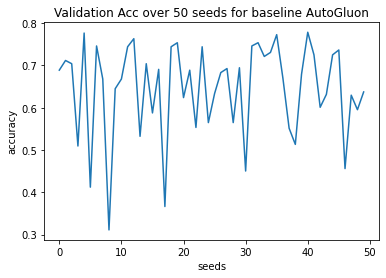

In [13]:
import matplotlib.pyplot as plt

plt.plot([acc['top1'] for acc in accs_val])
plt.xlabel('seeds')
plt.ylabel('accuracy')
plt.title('Validation Acc over 50 seeds for baseline AutoGluon');
plt.savefig('autogluon50seeds.png')